In [1]:
import os
import numpy as np
import time
from makedata   import make_determined_zangle_data
import tifffile

In [ ]:
np.random.seed(415)
datasize = (500, 500, 500)
dataset_name = "_angle_data"
os.makedirs(dataset_name, exist_ok=True)
for i in [0, "random", 90]:
    t1 = time.time()
    num     = 250 #param["train_object_num_max"] - i * train_object_diff
    data    = make_determined_zangle_data(num, datasize,  i)
    data_x  = data["data_x"]
    t2 = time.time()
    print(f'{t2 - t1} s')
    tifffile.imwrite(f'{dataset_name}/angle{str(i).zfill(2)}.tif',data_x)

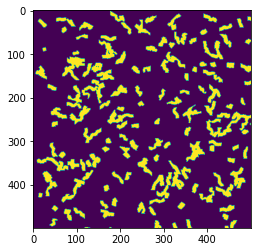

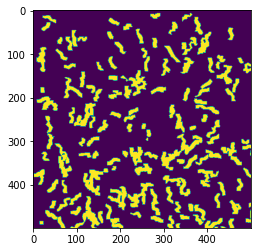

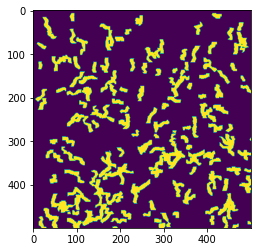

In [8]:
import matplotlib.pyplot as plt
from utils import mip
x = tifffile.imread("_angle_data/anglerandom.tif")
plt.imshow(mip(x, "xy", 0, 500))
plt.show()
plt.imshow(mip(x, "xz", 0, 500))
plt.show()
plt.imshow(mip(x, "yz", 0, 500))
plt.show()

In [7]:
!python3 blur.py /home/haruhiko/Documents/JNet/_angle_data/ /home/haruhiko/Documents/JNet/_angle_blur JNet_571 -keyword angle

/home/haruhiko/Documents/JNet/env/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
Training on device cuda.
initializing JNet model...
JNet init done (0.20 s)
torch.Size([1, 1, 500, 500, 500])
torch.Size([1, 1, 500, 500, 500])
torch.Size([1, 1, 500, 500, 500])


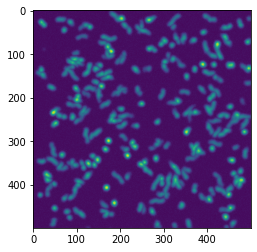

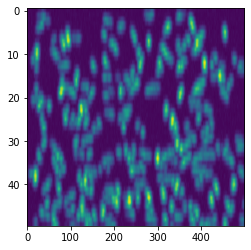

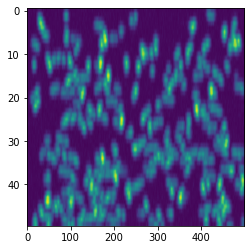

In [5]:
import matplotlib.pyplot as plt
from utils import mip

name = "anglerandom"
x = tifffile.imread(f"_angle_blur/{name}/{name}.tif")
plt.imshow(mip(x, "xy", 0, 500))
plt.show()
plt.imshow(mip(x, "xz", 0, 500), aspect=10)
plt.show()
plt.imshow(mip(x, "yz", 0, 500) ,aspect=10)
plt.show()